# PROJET 9 : Produisez une étude de marché avec R ou Python

### NOTEBOOK 1

## I- IMPORTATION DES LIBRAIRIES ET DES DONNEES

In [385]:
import pandas as pd

import datetime

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

In [386]:
from warnings import filterwarnings
filterwarnings('ignore') 

## II- Importation des DataFrames Disponibilité alimentaire et Population issues du projet " la poule qui chante", projet 9

## 1-  Importation de la DataFrame Dispo_Alimentaire

In [387]:
Dispo_Alimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [388]:
Dispo_Alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [389]:
Dispo_Alimentaire.tail()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée
176599,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,684,Disponibilité de matière grasse en quantité (g...,2899,Miscellanees,2017,2017,g/personne/jour,0.02,Fc,Donnée calculée


## 1-a Utilisation de methodes, .info(), .shape, .isna(), .duplicated(), .nunique(), .describe(),  .rename() pour observer la dataframe

In [390]:
Dispo_Alimentaire.shape

(176600, 14)

In [391]:
Dispo_Alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [392]:
Dispo_Alimentaire.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [393]:
Dispo_Alimentaire.duplicated().sum()

0

In [394]:
Dispo_Alimentaire.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [395]:
Dispo_Alimentaire.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [396]:
# Nous allons selectionner certaines colonnes

cols_1 = ["Domaine","Zone","Élément","Produit","Année","Unité","Valeur","Description du Symbole"]

In [397]:
Dispo_Alimentaire = Dispo_Alimentaire[cols_1]
Dispo_Alimentaire.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,Données standardisées
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,Données standardisées
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,Données standardisées
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,Données standardisées
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,Données standardisées


In [398]:
Dispo_Alimentaire = Dispo_Alimentaire.rename(columns={'Zone':'pays'})

## 2- Importation de la DataFrame Population

In [399]:
Population = pd.read_csv('Population_2000_2018.csv')
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [400]:
Population.tail()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN
4410,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,14438.802,X,Sources internationales sûres,NaN


## 2-a Utilisation de methodes, .info(), .shape, .isna(), .duplicated(), .nunique(), .describe(), .rename() pour observer la dataframe

In [401]:
Population.shape

(4411, 15)

In [402]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [403]:
Population.isna().mean()

Code Domaine              0.00000
Domaine                   0.00000
Code zone                 0.00000
Zone                      0.00000
Code Élément              0.00000
Élément                   0.00000
Code Produit              0.00000
Produit                   0.00000
Code année                0.00000
Année                     0.00000
Unité                     0.00000
Valeur                    0.00000
Symbole                   0.00000
Description du Symbole    0.00000
Note                      0.94151
dtype: float64

In [404]:
Population.duplicated().sum()

0

In [405]:
Population.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [406]:
Population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [407]:
# Nous allons selectionner certaines colonnes

cols_2 = ["Domaine","Zone","Élément","Produit","Année","Unité","Valeur","Description du Symbole"]

In [408]:
Population = Population[cols_2]
Population.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2000,1000 personnes,20779.953,Sources internationales sûres
1,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2001,1000 personnes,21606.988,Sources internationales sûres
2,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2002,1000 personnes,22600.770,Sources internationales sûres
3,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2003,1000 personnes,23680.871,Sources internationales sûres
4,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,2004,1000 personnes,24726.684,Sources internationales sûres


In [409]:
Population = Population.rename(columns={'Zone':'pays'})

## 3- RAPPROCHEMENT DES DATAFRAMES DISPONIBILITE ALIMENTAIRE ET POPULATION 

In [410]:
df_Dispo_Alimentaire_Population = pd.concat([Dispo_Alimentaire, Population], axis=0)

In [411]:
df_Dispo_Alimentaire_Population

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.000,Données standardisées
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.000,Données standardisées
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.000,Données standardisées
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.000,Données standardisées
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.000,Données standardisées
...,...,...,...,...,...,...,...,...
4406,Séries temporelles annuelles,Zimbabwe,Population totale,Population-Estimations,2014,1000 personnes,13586.707,Sources internationales sûres
4407,Séries temporelles annuelles,Zimbabwe,Population totale,Population-Estimations,2015,1000 personnes,13814.629,Sources internationales sûres
4408,Séries temporelles annuelles,Zimbabwe,Population totale,Population-Estimations,2016,1000 personnes,14030.331,Sources internationales sûres
4409,Séries temporelles annuelles,Zimbabwe,Population totale,Population-Estimations,2017,1000 personnes,14236.595,Sources internationales sûres


## 3-a Utilisation de methodes,.shape, .isna(), .duplicated(), .nunique(), pour observer la dataframe transformée

In [412]:
df_Dispo_Alimentaire_Population.shape

(181011, 8)

In [413]:
df_Dispo_Alimentaire_Population.isna().mean()

Domaine                   0.0
pays                      0.0
Élément                   0.0
Produit                   0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Description du Symbole    0.0
dtype: float64

In [414]:
df_Dispo_Alimentaire_Population.duplicated().sum()

0

In [415]:
df_Dispo_Alimentaire_Population.nunique()

Domaine                       2
pays                        238
Élément                      18
Produit                      99
Année                        19
Unité                         5
Valeur                    11615
Description du Symbole        4
dtype: int64

## 3-b Boite à moustaches pour observer les valeus abérantes de notre dataframe

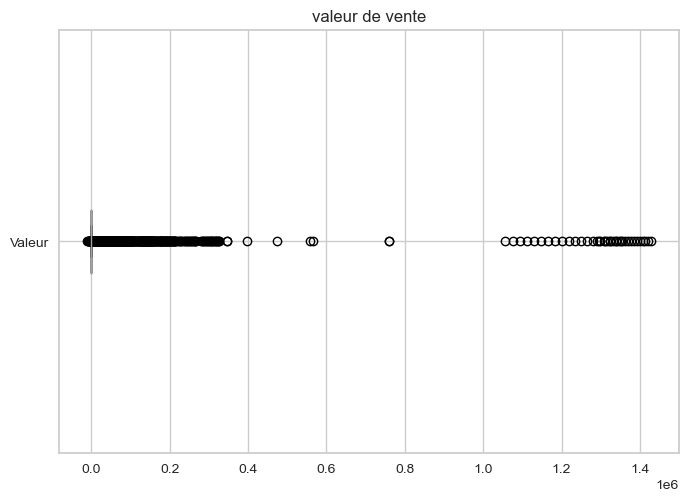

In [416]:
df_Dispo_Alimentaire_Population.boxplot(column='Valeur', vert=False).set_title('valeur de vente')
plt.show()

In [417]:
# Fonction pour observer les valeurs aberantes

  # Observons les valeurs aberantes de la vraibles "Valeur"
    

# Fonction pour determiner les outliers
# Valeur < Q1 - 1.5IQR ou Valeur > Q3 + 1.5IQR alors on a les outliers
def finding_outliers(data, variable_name):
    '''
    data = data frame pandas
    variable_name= nom de la variable (chaine de caractere)
    '''
    # Calcul de l'IQR Q1 et Q3
    iqr = stats.iqr(data[variable_name])
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    # Calcul de limite de Q1 - 1.5IQR et Q3 + 1.5IQR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Dataframe des valeurs aberantes 
    outliers_df = data[(data[variable_name]<lower) | (data[variable_name]>upper)]
    return outliers_df

In [418]:
# point de données aberants de la variable indiquant la valeur

finding_outliers(data = df_Dispo_Alimentaire_Population, variable_name = 'Valeur').sort_values(by=['Valeur'])

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
77209,Nouveaux Bilans Alimentaire,Indonésie,Variation de stock,Palmistes,2017,Milliers de tonnes,-10388.000,Données standardisées
35130,Nouveaux Bilans Alimentaire,"Chine, continentale",Variation de stock,"Sucre, canne",2017,Milliers de tonnes,-9389.000,Données standardisées
55230,Nouveaux Bilans Alimentaire,États-Unis d'Amérique,Variation de stock,Blé et produits,2017,Milliers de tonnes,-8030.000,Données standardisées
24207,Nouveaux Bilans Alimentaire,Brésil,Variation de stock,Maïs et produits,2017,Milliers de tonnes,-6706.000,Données standardisées
161815,Nouveaux Bilans Alimentaire,Thaïlande,Variation de stock,Manioc et produits,2017,Milliers de tonnes,-6528.000,Données standardisées
...,...,...,...,...,...,...,...,...
820,Séries temporelles annuelles,"Chine, continentale",Population totale,Population-Estimations,2014,1000 personnes,1399453.965,Sources internationales sûres
821,Séries temporelles annuelles,"Chine, continentale",Population totale,Population-Estimations,2015,1000 personnes,1406847.870,Sources internationales sûres
822,Séries temporelles annuelles,"Chine, continentale",Population totale,Population-Estimations,2016,1000 personnes,1414049.351,Sources internationales sûres
823,Séries temporelles annuelles,"Chine, continentale",Population totale,Population-Estimations,2017,1000 personnes,1421021.791,Sources internationales sûres


## 4- Transformation de notre dataframe apres jointure , afin d'adapter à notre futur travail

In [419]:
df_Dispo_Alimentaire_Population.head()

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0,Données standardisées
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0,Données standardisées
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0,Données standardisées
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0,Données standardisées
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0,Données standardisées


In [420]:
df_Dispo_Alimentaire_Population.shape

(181011, 8)

In [421]:
df_Dispo_Alimentaire_Population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181011 entries, 0 to 4410
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Domaine                 181011 non-null  object 
 1   pays                    181011 non-null  object 
 2   Élément                 181011 non-null  object 
 3   Produit                 181011 non-null  object 
 4   Année                   181011 non-null  int64  
 5   Unité                   181011 non-null  object 
 6   Valeur                  181011 non-null  float64
 7   Description du Symbole  181011 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.4+ MB


In [422]:
# Observons les différentes fréquences des années

df_Dispo_Alimentaire_Population['Année'].value_counts()

2017    176836
2012       236
2016       236
2015       236
2014       236
2013       236
2018       236
2011       235
2006       230
2007       230
2009       230
2010       230
2008       230
2000       229
2005       229
2004       229
2003       229
2002       229
2001       229
Name: Année, dtype: int64

In [423]:
# Observons nos différents produits

df_Dispo_Alimentaire_Population['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [424]:
# Observons nos différents élements aussi

df_Dispo_Alimentaire_Population['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes', 'Population totale'], dtype=object)

## 4-a Utilisation de la methode .loc(),  pour filtrer nos produits et nos éléments selon l'année

In [426]:
# Nous filtrons nos produits sur l'année 2017 et Nous rajoutons à notre filtration de produit "Population-Estimations" et
# "Viande de Volailles"

Dispo_Alimentaire_Population = df_Dispo_Alimentaire_Population.loc[(df_Dispo_Alimentaire_Population['Année'] == 2017) &
                                                                   (df_Dispo_Alimentaire_Population['Produit'].
                                                                    isin(['Population-Estimations','Viande de Volailles'])),
                                                                   :].copy()

In [427]:
# Enfin nous rajoutons nos 5 éléments selectionnés à notre filtration

Dispo_Alimentaire_Population = Dispo_Alimentaire_Population.loc[(Dispo_Alimentaire_Population['Élément'].
                                                                 isin(['Disponibilité alimentaire (Kcal/personne/jour)',
                                                                       'Disponibilité intérieure',
                                                                       'Exportations - Quantité',
                                                                       'Importations - Quantité',
                                                                       'Production', 'Population totale'])), :].copy()

In [428]:
Dispo_Alimentaire_Population.head()

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
651,Nouveaux Bilans Alimentaire,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.0,Données standardisées
652,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0,Données standardisées
654,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.0,Données standardisées
659,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,Kcal/personne/jour,5.0,Donnée calculée
1704,Nouveaux Bilans Alimentaire,Afrique du Sud,Production,Viande de Volailles,2017,Milliers de tonnes,1667.0,Données standardisées


## 4-b Utilisation de la fonction pivot_table(), pour créer une table croisée dynamique

- La fonction pivot_table en Python est utilisée pour créer une table croisée dynamique (ou tableau croisé dynamique) à partir d'un ensemble de données. Elle permet de réorganiser et de résumer les données de manière à faciliter l'analyse et la visualisation des relations entre les différentes variables.

In [429]:
Dispo_Alimentaire_Population = pd.pivot_table(Dispo_Alimentaire_Population, values='Valeur',
                                                   index='pays', 
                                                   columns=['Élément'], aggfunc='sum')

In [430]:
Dispo_Alimentaire_Population.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population totale,Production
pays,,,,,,
Afghanistan,5.0,57.0,NaN,29.0,36296.113,28.0
Afrique du Sud,143.0,2118.0,63.0,514.0,57009.756,1667.0
Albanie,85.0,47.0,0.0,38.0,2884.169,13.0
Algérie,22.0,277.0,0.0,2.0,41389.189,275.0
Allemagne,71.0,1739.0,646.0,842.0,82658.409,1514.0


In [431]:
# Suppression de certaines valeurs manquantes 

Dispo_Alimentaire_Population = Dispo_Alimentaire_Population.dropna(subset=
                                                                         ['Disponibilité alimentaire (Kcal/personne/jour)'])

In [432]:
Dispo_Alimentaire_Population

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population totale,Production
pays,,,,,,
Afghanistan,5.0,57.0,NaN,29.0,36296.113,28.0
Afrique du Sud,143.0,2118.0,63.0,514.0,57009.756,1667.0
Albanie,85.0,47.0,0.0,38.0,2884.169,13.0
Algérie,22.0,277.0,0.0,2.0,41389.189,275.0
Allemagne,71.0,1739.0,646.0,842.0,82658.409,1514.0
...,...,...,...,...,...,...
Émirats arabes unis,147.0,412.0,94.0,433.0,9487.203,48.0
Équateur,83.0,341.0,0.0,0.0,16785.361,340.0
États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,325084.756,21914.0


In [433]:
Dispo_Alimentaire_Population.isna().mean()

Élément
Disponibilité alimentaire (Kcal/personne/jour)    0.000000
Disponibilité intérieure                          0.011628
Exportations - Quantité                           0.215116
Importations - Quantité                           0.011628
Population totale                                 0.000000
Production                                        0.023256
dtype: float64

- Attention

Cela n'est peut-etre pas la méthode la plus solide ou la plus sérieuse. En effet, le traitement des valeurs manquantes peut être un sujet sensible et délicat. Cela requiert une attention toute particulière!

Dans mon cas, nous pouvons simplement imputer les valeurs manquantes par la moyenne. Cela n'est pas la meilleure chose à faire, mais c'est la plus rapide! 

In [434]:
Dispo_Alimentaire_Population = Dispo_Alimentaire_Population.fillna(Dispo_Alimentaire_Population.mean())
Dispo_Alimentaire_Population.isna().mean()

Élément
Disponibilité alimentaire (Kcal/personne/jour)    0.0
Disponibilité intérieure                          0.0
Exportations - Quantité                           0.0
Importations - Quantité                           0.0
Population totale                                 0.0
Production                                        0.0
dtype: float64

In [435]:
Dispo_Alimentaire_Population.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population totale,Production
pays,,,,,,
Afghanistan,5.0,57.0,132.185185,29.0,36296.113,28.0
Afrique du Sud,143.0,2118.0,63.000000,514.0,57009.756,1667.0
Albanie,85.0,47.0,0.000000,38.0,2884.169,13.0
Algérie,22.0,277.0,0.000000,2.0,41389.189,275.0
Allemagne,71.0,1739.0,646.000000,842.0,82658.409,1514.0


# III- IMPORTATION DES DONNEES TELECHARGER SUR LE SITE FAO


## DATAFRAME Indicateurs_macro ET securite_alimentaire


- LES INDICATEURS(liens pour télécharger les données suplemetaires de la FAO)

http://www.fao.org/faostat/fr/#data/

https://www.fao.org/faostat/fr/#data/HS

https://www.fao.org/faostat/fr/#data/MK

https://www.fao.org/faostat/fr/#data/FS

## 1- Importation de la dataframe Indicateurs_macro

In [436]:
Indicateurs_macro = pd.read_csv('Indicateurs_macro_fao.csv')
Indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.889635e+04,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,3.808514e+05,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.301973e+04,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,1.700970e+05,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,millions,3.690849e+06,X,Ciffre de sources internationales,NaN


## 1-a Utilisation de methodes, .info(), .shape, .isna(), .duplicated(), .nunique(), .describe(), .rename() pour observer la dataframe

In [437]:
Indicateurs_macro.shape

(211, 15)

In [438]:
Indicateurs_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [439]:
Indicateurs_macro.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

In [440]:
Indicateurs_macro.duplicated().sum()

0

In [441]:
Indicateurs_macro.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           211
Zone                      211
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    211
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [442]:
Indicateurs_macro.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,211.000000,211.0,211.0,211.0,211.0,2.110000e+02,0.0
mean,429.407583,6110.0,22008.0,2017.0,2017.0,4.429028e+05,NaN
std,251.237972,0.0,0.0,0.0,0.0,1.875353e+06,NaN
min,4.000000,6110.0,22008.0,2017.0,2017.0,4.529575e+01,NaN
25%,210.000000,6110.0,22008.0,2017.0,2017.0,5.721181e+03,NaN
50%,430.000000,6110.0,22008.0,2017.0,2017.0,2.497919e+04,NaN
75%,642.500000,6110.0,22008.0,2017.0,2017.0,1.911765e+05,NaN
max,894.000000,6110.0,22008.0,2017.0,2017.0,1.947734e+07,NaN


In [443]:
# Nous allons selectionner certaines colonnes

cols_3 = ["Domaine","Zone","Élément","Produit","Année","Unité","Valeur","Description du Symbole"]

In [444]:
Indicateurs_macro = Indicateurs_macro[cols_3]
Indicateurs_macro.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Indicateurs macro,Afghanistan,Valeur US $,Produit Intérieur Brut,2017,millions,1.889635e+04,Ciffre de sources internationales
1,Indicateurs macro,Afrique du Sud,Valeur US $,Produit Intérieur Brut,2017,millions,3.808514e+05,Ciffre de sources internationales
2,Indicateurs macro,Albanie,Valeur US $,Produit Intérieur Brut,2017,millions,1.301973e+04,Ciffre de sources internationales
3,Indicateurs macro,Algérie,Valeur US $,Produit Intérieur Brut,2017,millions,1.700970e+05,Ciffre de sources internationales
4,Indicateurs macro,Allemagne,Valeur US $,Produit Intérieur Brut,2017,millions,3.690849e+06,Ciffre de sources internationales


In [445]:
Indicateurs_macro = Indicateurs_macro.rename(columns={'Zone':'pays'})

## 2- Importation de la dataframe securité_alimentaire

In [446]:
securite_alimentaire = pd.read_csv('Données_sécurité_alimentaire_fao.csv')
securite_alimentaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071,Nombre de personnes en situation d’insécurité ...,20162018,2016-2018,millions,6.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071M,Nombre de personnes en situation d’insécurité ...,20162018,2016-2018,millions,1.6,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071F,Nombre de femmes adultes en situation d’insécu...,20162018,2016-2018,millions,1.9,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081M,Nombre d’hommes adultes en situation d’insécur...,20162018,2016-2018,millions,5.3,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081F,Nombre de femmes adultes en situation d’insécu...,20162018,2016-2018,millions,5.7,E,Valeur estimée,NaN


## 2-a Utilisation de methodes, .info(), .shape, .isna(), .duplicated(), .nunique(), .describe(), .rename(), .astype(),  pour observer la dataframe

In [447]:
securite_alimentaire.shape

(1020, 15)

In [448]:
securite_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            1020 non-null   object
 1   Domaine                 1020 non-null   object
 2   Code zone (M49)         1020 non-null   int64 
 3   Zone                    1020 non-null   object
 4   Code Élément            1020 non-null   int64 
 5   Élément                 1020 non-null   object
 6   Code Produit            1020 non-null   object
 7   Produit                 1020 non-null   object
 8   Code année              1020 non-null   int64 
 9   Année                   1020 non-null   object
 10  Unité                   1020 non-null   object
 11  Valeur                  544 non-null    object
 12  Symbole                 1020 non-null   object
 13  Description du Symbole  1020 non-null   object
 14  Note                    44 non-null     object
dtypes: i

## 2-b- Utilisation de fonction pour derterminer la moyenne entre les intervalles de dates

In [449]:
'2016-2018'.split('-')

['2016', '2018']

In [450]:
def compute_year(span):
    values = span.split('-')
    values = np.array(values).astype(int)
    return int(values.mean())

In [451]:
securite_alimentaire['Année'] = securite_alimentaire['Année'].apply(compute_year)
securite_alimentaire

# Tout d'abord, j'ai separé les intervalles des dates afin de determiner la moyenne des deux dates
# j'ai utilisé une fonction compute_year pour calculer l'intervalle entre les années afin de definir la moyenne 
# entre l'année 2016 et 2018 années.

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,6.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071M,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,1.6,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071F,Nombre de femmes adultes en situation d’insécu...,20162018,2017,millions,1.9,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081M,Nombre d’hommes adultes en situation d’insécur...,20162018,2017,millions,5.3,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081F,Nombre de femmes adultes en situation d’insécu...,20162018,2017,millions,5.7,E,Valeur estimée,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,FS,Données de la sécurité alimentaire,716,Zimbabwe,6132,Valeur,210071,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,5.1,E,Valeur estimée,NaN
1016,FS,Données de la sécurité alimentaire,716,Zimbabwe,6132,Valeur,210071M,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,1.2,E,Valeur estimée,NaN
1017,FS,Données de la sécurité alimentaire,716,Zimbabwe,6132,Valeur,210071F,Nombre de femmes adultes en situation d’insécu...,20162018,2017,millions,1.5,E,Valeur estimée,NaN
1018,FS,Données de la sécurité alimentaire,716,Zimbabwe,6132,Valeur,210081M,Nombre d’hommes adultes en situation d’insécur...,20162018,2017,millions,2.4,E,Valeur estimée,NaN


In [452]:
securite_alimentaire['Valeur'].unique()

array(['6.3', '1.6', '1.9', '5.3', '5.7', nan, '0.3', '0.1', '0.4', '0.5',
       '4.7', '1.4', '1.7', '2.5', '2.9', '0.6', '0.2', '1.3', '1', '4.9',
       '4', '<0.1', '0.9', '1.2', '18.5', '6.2', '6.5', '17.7', '17.1',
       '3.6', '3.1', '8.9', '12.7', '2.3', '2.2', '2', '2.7', '6.9',
       '1.5', '1.1', '0.7', '2.1', '8.3', '8.8', '11.3', '2.8', '7.9',
       '9', '21.2', '26.4', '15.7', '4.4', '4.1', '18.4', '4.6', '5.5',
       '4.3', '0.8', '6', '2.4', '12.3', '10.6', '30.7', '28.1', '7',
       '12.8', '12.1', '1.8', '10.9', '5.6', '9.3', '11', '3.4', '4.2',
       '4.5', '5', '11.9', '15.4', '11.7', '3', '5.8', '2.6', '3.3', '26',
       '14.7', '35.8', '34.9', '10.1', '5.2', '5.1', '8.5', '8.7', '3.7',
       '5.9', '17.3', '22.7', '5.4', '14', '10', '7.1', '8', '3.2', '4.8'],
      dtype=object)

## 2-c Remplacer les valeurs nulles (NaN) et utilisation de la méthode boolean pour remplacer les valeurs non numerique

In [453]:
securite_alimentaire['Valeur'].replace('<0.1', 0)

0       6.3
1       1.6
2       1.9
3       5.3
4       5.7
       ... 
1015    5.1
1016    1.2
1017    1.5
1018    2.4
1019    2.9
Name: Valeur, Length: 1020, dtype: object

In [454]:
test = securite_alimentaire['Valeur']
mask = test == '<0.1'
test.loc[mask]

50     <0.1
51     <0.1
52     <0.1
60     <0.1
61     <0.1
       ... 
909    <0.1
925    <0.1
926    <0.1
927    <0.1
986    <0.1
Name: Valeur, Length: 122, dtype: object

In [455]:
test = securite_alimentaire['Valeur'].replace('<0.1', 0)
mask = test == '<0.1'
test.loc[mask]

Series([], Name: Valeur, dtype: object)

In [456]:
securite_alimentaire['Valeur'] = securite_alimentaire['Valeur'].replace('<0.1', 0)

# j'ai utilisé la methode boolean pour remplacer les valeurs non numerique en valeurs numerique

In [457]:
securite_alimentaire['Valeur'] = securite_alimentaire['Valeur'].fillna(0)

# j'ai utilisé la methode .fillna() pour remplacer les valeurs NaN

In [458]:
securite_alimentaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,6.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071M,Nombre de personnes en situation d’insécurité ...,20162018,2017,millions,1.6,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210071F,Nombre de femmes adultes en situation d’insécu...,20162018,2017,millions,1.9,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081M,Nombre d’hommes adultes en situation d’insécur...,20162018,2017,millions,5.3,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6132,Valeur,210081F,Nombre de femmes adultes en situation d’insécu...,20162018,2017,millions,5.7,E,Valeur estimée,NaN


In [459]:
securite_alimentaire['Valeur'] = securite_alimentaire['Valeur'].astype('float')

In [460]:
securite_alimentaire.isna().mean()

Code Domaine              0.000000
Domaine                   0.000000
Code zone (M49)           0.000000
Zone                      0.000000
Code Élément              0.000000
Élément                   0.000000
Code Produit              0.000000
Produit                   0.000000
Code année                0.000000
Année                     0.000000
Unité                     0.000000
Valeur                    0.000000
Symbole                   0.000000
Description du Symbole    0.000000
Note                      0.956863
dtype: float64

In [461]:
securite_alimentaire.duplicated().sum()

0

In [462]:
securite_alimentaire.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           204
Zone                      204
Code Élément                1
Élément                     1
Code Produit                5
Produit                     4
Code année                  1
Année                       1
Unité                       1
Valeur                    102
Symbole                     3
Description du Symbole      3
Note                        2
dtype: int64

In [463]:
securite_alimentaire.describe()

,Code zone (M49),Code Élément,Code année,Année,Valeur
count,1020.000000,1020.0,1020.0,1020.0,1020.000000
mean,425.171569,6132.0,20162018.0,2017.0,1.181373
std,253.968164,0.0,0.0,0.0,3.489196
min,4.000000,6132.0,20162018.0,2017.0,0.000000
25%,203.750000,6132.0,20162018.0,2017.0,0.000000
50%,420.000000,6132.0,20162018.0,2017.0,0.000000
75%,642.250000,6132.0,20162018.0,2017.0,0.600000
max,894.000000,6132.0,20162018.0,2017.0,35.800000


In [464]:
# Nous allons selectionner certaines colonnes

cols_4 = ["Domaine","Zone","Élément","Produit","Année","Unité","Valeur","Description du Symbole"]

In [465]:
securite_alimentaire = securite_alimentaire[cols_4]
securite_alimentaire.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,6.3,Valeur estimée
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.6,Valeur estimée
2,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.9,Valeur estimée
3,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,5.3,Valeur estimée
4,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,5.7,Valeur estimée


In [466]:
securite_alimentaire = securite_alimentaire.rename(columns={'Zone':'pays'})

## 3- RAPPROCHEMENT DES DATAFRAMES SECURITE ALIMENTAIRE ET INDICATEURS MACRO

In [467]:
df_securite_alimentaire_Indicateurs_macro = pd.concat([securite_alimentaire, Indicateurs_macro], axis=0)

In [468]:
df_securite_alimentaire_Indicateurs_macro

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,6.30000,Valeur estimée
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.60000,Valeur estimée
2,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.90000,Valeur estimée
3,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,5.30000,Valeur estimée
4,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,5.70000,Valeur estimée
...,...,...,...,...,...,...,...,...
206,Indicateurs macro,Venezuela (République bolivarienne du),Valeur US $,Produit Intérieur Brut,2017,millions,247932.19980,Ciffre de sources internationales
207,Indicateurs macro,Viet Nam,Valeur US $,Produit Intérieur Brut,2017,millions,223779.86610,Ciffre de sources internationales
208,Indicateurs macro,Yémen,Valeur US $,Produit Intérieur Brut,2017,millions,18391.64982,Ciffre de sources internationales
209,Indicateurs macro,Zambie,Valeur US $,Produit Intérieur Brut,2017,millions,25868.16149,Ciffre de sources internationales


## 3-a Utilisation de methodes,.shape, .isna(), .duplicated(), .drop_duplicates(), .nunique(), pour observer la dataframe transformée

In [469]:
df_securite_alimentaire_Indicateurs_macro.shape

(1231, 8)

In [470]:
df_securite_alimentaire_Indicateurs_macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 210
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 1231 non-null   object 
 1   pays                    1231 non-null   object 
 2   Élément                 1231 non-null   object 
 3   Produit                 1231 non-null   object 
 4   Année                   1231 non-null   int64  
 5   Unité                   1231 non-null   object 
 6   Valeur                  1231 non-null   float64
 7   Description du Symbole  1231 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 86.6+ KB


In [471]:
df_securite_alimentaire_Indicateurs_macro.isna().mean()

Domaine                   0.0
pays                      0.0
Élément                   0.0
Produit                   0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Description du Symbole    0.0
dtype: float64

In [472]:
df_securite_alimentaire_Indicateurs_macro.duplicated().sum()

106

In [473]:
df_securite_alimentaire_Indicateurs_macro = df_securite_alimentaire_Indicateurs_macro.drop_duplicates()

In [474]:
df_securite_alimentaire_Indicateurs_macro.nunique()

Domaine                     2
pays                      215
Élément                     2
Produit                     5
Année                       1
Unité                       1
Valeur                    313
Description du Symbole      4
dtype: int64

## 3-b Boite à moustaches pour observer les valeus abérantes de notre dataframe

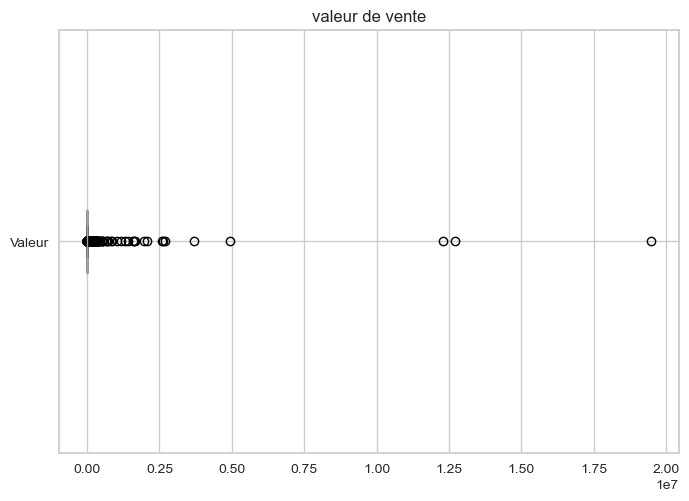

In [475]:
df_securite_alimentaire_Indicateurs_macro.boxplot(column='Valeur', vert=False).set_title('valeur de vente')
plt.show()

In [476]:
# Fonction pour observer les valeurs aberantes

  # Observons les valeurs aberantes de la vraibles "Valeur"
    

# Fonction pour determiner les outliers
# Valeur < Q1 - 1.5IQR ou Valeur > Q3 + 1.5IQR alors on a les outliers
def finding_outliers(data, variable_name):
    '''
    data = data frame pandas
    variable_name= nom de la variable (chaine de caractere)
    '''
    # Calcul de l'IQR Q1 et Q3
    iqr = stats.iqr(data[variable_name])
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    # Calcul de limite de Q1 - 1.5IQR et Q3 + 1.5IQR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Dataframe des valeurs aberantes 
    outliers_df = data[(data[variable_name]<lower) | (data[variable_name]>upper)]
    return outliers_df

In [477]:
# point de données aberants de la variable indiquant la valeur

finding_outliers(data = df_securite_alimentaire_Indicateurs_macro, variable_name = 'Valeur').sort_values(by=['Valeur'])

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
431,Données de la sécurité alimentaire,Indonésie,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.230000e+01,Valeur estimée
647,Données de la sécurité alimentaire,Nigéria,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.230000e+01,Valeur estimée
139,Données de la sécurité alimentaire,Brésil,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.270000e+01,Valeur estimée
438,Données de la sécurité alimentaire,Iran (République islamique d'),Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,1.280000e+01,Valeur estimée
795,Données de la sécurité alimentaire,République-Unie de Tanzanie,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.400000e+01,Chiffre officiel
...,...,...,...,...,...,...,...,...
4,Indicateurs macro,Allemagne,Valeur US $,Produit Intérieur Brut,2017,millions,3.690849e+06,Ciffre de sources internationales
99,Indicateurs macro,Japon,Valeur US $,Produit Intérieur Brut,2017,millions,4.930837e+06,Ciffre de sources internationales
42,Indicateurs macro,"Chine, continentale",Valeur US $,Produit Intérieur Brut,2017,millions,1.231049e+07,Ciffre de sources internationales
39,Indicateurs macro,Chine,Valeur US $,Produit Intérieur Brut,2017,millions,1.270220e+07,Ciffre de sources internationales


## 4- Transformation de notre dataframe apres jointure , afin d'adapter à notre futur travail

In [478]:
df_securite_alimentaire_Indicateurs_macro.head()

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,6.3,Valeur estimée
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.6,Valeur estimée
2,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.9,Valeur estimée
3,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,5.3,Valeur estimée
4,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,5.7,Valeur estimée


In [479]:
df_securite_alimentaire_Indicateurs_macro.shape

(1125, 8)

In [480]:
df_securite_alimentaire_Indicateurs_macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 0 to 210
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 1125 non-null   object 
 1   pays                    1125 non-null   object 
 2   Élément                 1125 non-null   object 
 3   Produit                 1125 non-null   object 
 4   Année                   1125 non-null   int64  
 5   Unité                   1125 non-null   object 
 6   Valeur                  1125 non-null   float64
 7   Description du Symbole  1125 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.1+ KB


In [481]:
df_securite_alimentaire_Indicateurs_macro['Année'].value_counts()

2017    1125
Name: Année, dtype: int64

In [482]:
df_securite_alimentaire_Indicateurs_macro['Produit'].unique()

array(['Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
       'Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)',
       'Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)',
       'Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)',
       'Produit Intérieur Brut'], dtype=object)

In [483]:
df_securite_alimentaire_Indicateurs_macro['Élément'].unique()

array(['Valeur', 'Valeur US $'], dtype=object)

## 4-a Utilisation de la methode .loc(), pour filtrer nos produits et nos éléments selon l'année

In [484]:
# Nous filtrons nos produits sur l'année 2017 et nous precisons les fifférents produits concernés

securite_alimentaire_Indicateurs_macro =df_securite_alimentaire_Indicateurs_macro.loc[(df_securite_alimentaire_Indicateurs_macro['Année'] == 2017) &
                                                                   (df_securite_alimentaire_Indicateurs_macro['Produit'].
                                                                    isin(["Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)" ,
                                                                          "Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)",
                                                                          "Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)",
                                                                          "Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)"])),:].copy()

In [485]:
# Enfin nous rajoutons nos 2 éléments selectionnés à notre filtration

securite_alimentaire_Indicateurs_macro = securite_alimentaire_Indicateurs_macro.loc[(securite_alimentaire_Indicateurs_macro['Élément'].
                                                                 isin(['Valeur','Valeur US $'])), :].copy()

In [486]:
securite_alimentaire_Indicateurs_macro

,Domaine,pays,Élément,Produit,Année,Unité,Valeur,Description du Symbole
0,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,6.3,Valeur estimée
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.6,Valeur estimée
2,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.9,Valeur estimée
3,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,5.3,Valeur estimée
4,Données de la sécurité alimentaire,Afghanistan,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,5.7,Valeur estimée
...,...,...,...,...,...,...,...,...
1015,Données de la sécurité alimentaire,Zimbabwe,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,5.1,Valeur estimée
1016,Données de la sécurité alimentaire,Zimbabwe,Valeur,Nombre de personnes en situation d’insécurité ...,2017,millions,1.2,Valeur estimée
1017,Données de la sécurité alimentaire,Zimbabwe,Valeur,Nombre de femmes adultes en situation d’insécu...,2017,millions,1.5,Valeur estimée
1018,Données de la sécurité alimentaire,Zimbabwe,Valeur,Nombre d’hommes adultes en situation d’insécur...,2017,millions,2.4,Valeur estimée


## 4-b Utilisation de la fonction pivot_table(), pour créer une table croisée dynamique

- La fonction pivot_table en Python est utilisée pour créer une table croisée dynamique (ou tableau croisé dynamique) à partir d'un ensemble de données. Elle permet de réorganiser et de résumer les données de manière à faciliter l'analyse et la visualisation des relations entre les différentes variables.

In [487]:
securite_alimentaire_Indicateurs_macro = pd.pivot_table(securite_alimentaire_Indicateurs_macro, values='Valeur',
                                                   index='pays', 
                                                   columns=['Élément','Produit'], aggfunc='sum')

In [488]:
securite_alimentaire_Indicateurs_macro

Élément                                                                                                            Valeur  \
Produit               Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)   
pays                                                                                                                        
Afghanistan                                                          1.9                                                    
Afrique du Sud                                                       0.0                                                    
Albanie                                                              0.1                                                    
Algérie                                                              1.7                                                    
Allemagne                                                            0.2                                                    
...                                                                  ...                                                    
États-Unis d'Amérique                                                9.0                                                    
Éthiopie                                                             4.1                                                    
Îles Cook                                                            0.0                                                    
Îles Marshall                                                        0.0                                                    
Îles Salomon                                                         0.0                                                    

Élément                                                                                                                               \
Produit               Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)   
pays                                                                                                                                   
Afghanistan                                                          5.7                                                               
Afrique du Sud                                                       0.0                                                               
Albanie                                                              0.5                                                               
Algérie                                                              2.9                                                               
Allemagne                                                            1.0                                                               
...                                                                  ...                                                               
États-Unis d'Amérique                                               26.4                                                               
Éthiopie                                                            17.1                                                               
Îles Cook                                                            0.0                                                               
Îles Marshall                                                        0.0                                                               
Îles Salomon                                                         0.0                                                               

Élément                                                                                                               \
Produit               Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)   
pays                                                                                                    

In [489]:
securite_alimentaire_Indicateurs_macro.isna().mean()

Élément  Produit                                                                                                       
Valeur   Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)               0.0
         Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)    0.0
         Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)                    0.0
         Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)     0.0
dtype: float64

In [490]:
securite_alimentaire_Indicateurs_macro = securite_alimentaire_Indicateurs_macro.fillna(Dispo_Alimentaire_Population.mean())
securite_alimentaire_Indicateurs_macro.isna().mean()

Élément  Produit                                                                                                       
Valeur   Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)               0.0
         Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)    0.0
         Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)                    0.0
         Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)     0.0
dtype: float64

In [491]:
securite_alimentaire_Indicateurs_macro.head()

Élément                                                                                                     Valeur  \
Produit        Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)   
pays                                                                                                                 
Afghanistan                                                   1.9                                                    
Afrique du Sud                                                0.0                                                    
Albanie                                                       0.1                                                    
Algérie                                                       1.7                                                    
Allemagne                                                     0.2                                                    

Élément                                                                                                                        \
Produit        Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)   
pays                                                                                                                            
Afghanistan                                                   5.7                                                               
Afrique du Sud                                                0.0                                                               
Albanie                                                       0.5                                                               
Algérie                                                       2.9                                                               
Allemagne                                                     1.0                                                               

Élément                                                                                                        \
Produit        Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)   
pays                                                                                                            
Afghanistan                                                   7.9                                               
Afrique du Sud                                                0.0                                               
Albanie                                                       0.4                                               
Algérie                                                       6.1                                               
Allemagne                                                     0.8                                               

Élément                                                                                                                       
Produit        Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)  
pays                                                                                                                          
Afghanistan                                                   5.3                                                             
Afrique du Sud                                                0.0                                                             
Albanie                                                       0.4                                                             
Algérie                                                       2.5                                                             
Allemagne                                                     1.3

# IV- RAPPROCHEMENT DES DATAFRAMES Dispo_Alimentaire_Population et securite_alimentaire_Indicateurs_macro

## 1- JOINTURE FINALE DE NOS DATAFRAMES AVEC LA FONCTION PIVOT_TABLE

In [492]:
securite_alimentaire_Indicateurs_macro_Dispo_Alimentaire_Population = pd.merge(securite_alimentaire_Indicateurs_macro,
                                                                                Dispo_Alimentaire_Population,
                                                                                on='pays', how='inner')

In [493]:
# Utilisation de reset_index('pays') pour enlever le pays en Index

securite_alimentaire_Indicateurs_macro_Dispo_Alimentaire_Population = securite_alimentaire_Indicateurs_macro_Dispo_Alimentaire_Population.reset_index('pays')

In [494]:
securite_alimentaire_Indicateurs_macro_Dispo_Alimentaire_Population

,pays,"(Valeur, Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans))","(Valeur, Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans))","(Valeur, Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans))","(Valeur, Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans))",Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population totale,Production
0,Afghanistan,1.9,5.7,7.9,5.3,5.0,57.0,132.185185,29.0,36296.113,28.0
1,Afrique du Sud,0.0,0.0,0.0,0.0,143.0,2118.0,63.000000,514.0,57009.756,1667.0
2,Albanie,0.1,0.5,0.4,0.4,85.0,47.0,0.000000,38.0,2884.169,13.0
3,Algérie,1.7,2.9,6.1,2.5,22.0,277.0,0.000000,2.0,41389.189,275.0
4,Allemagne,0.2,1.0,0.8,1.3,71.0,1739.0,646.000000,842.0,82658.409,1514.0
...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,0.0,0.0,0.0,0.0,147.0,412.0,94.000000,433.0,9487.203,48.0
168,Équateur,1.1,2.8,2.4,2.5,83.0,341.0,0.000000,0.0,16785.361,340.0
169,États-Unis d'Amérique,9.0,26.4,10.8,21.2,219.0,18266.0,3692.000000,123.0,325084.756,21914.0
170,Éthiopie,4.1,17.1,20.1,18.4,0.0,14.0,132.185185,1.0,106399.924,14.0


## 1-a Sauvegarde du dataframe obtenue en fichier csv

In [495]:
securite_alimentaire_Indicateurs_macro_Dispo_Alimentaire_Population.to_csv("data_preprocess_jointure_final_projet_9_csv")

In [496]:
X = pd.read_csv('data_preprocess_jointure_final_projet_9_csv',  index_col = 0)
X.head()

,pays,"('Valeur', 'Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')","('Valeur', 'Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)')","('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')","('Valeur', 'Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)')",Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population totale,Production
0,Afghanistan,1.9,5.7,7.9,5.3,5.0,57.0,132.185185,29.0,36296.113,28.0
1,Afrique du Sud,0.0,0.0,0.0,0.0,143.0,2118.0,63.000000,514.0,57009.756,1667.0
2,Albanie,0.1,0.5,0.4,0.4,85.0,47.0,0.000000,38.0,2884.169,13.0
3,Algérie,1.7,2.9,6.1,2.5,22.0,277.0,0.000000,2.0,41389.189,275.0
4,Allemagne,0.2,1.0,0.8,1.3,71.0,1739.0,646.000000,842.0,82658.409,1514.0
